# Painting Streets.

The idea is to paint the street directions with a cyclic color map. We will
use a $90 \degree$-periodicity in the $360\degree$ spectrum. This way street
grids with right angles will appear in the same color.

In [2]:
import osmnx as ox
import networkx as nx

Show procedure for Brooklyn as example.
First get the street graph, make it undirected and add bearings (street
directions). For demonstration purposes plot the graph and its orientation bins.
Note: the bearings do not

In [10]:
G = ox.graph_from_place("Brooklyn")
G = ox.get_undirected(G)
G = ox.add_edge_bearings(G)

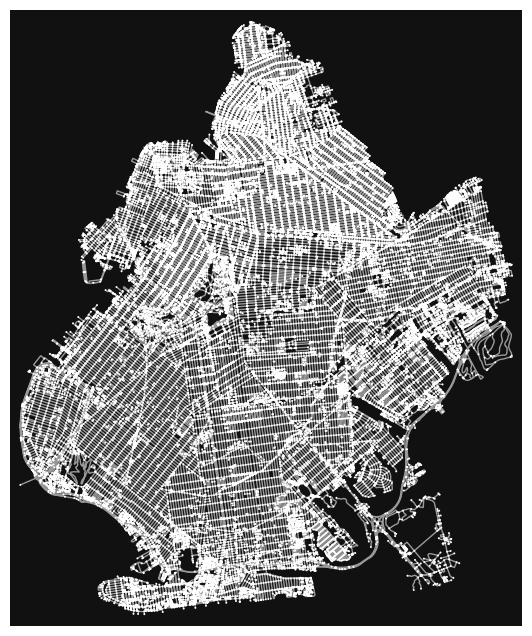

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [17]:
ox.plot_graph(G, node_size=2)

(<Figure size 500x500 with 1 Axes>, <PolarAxesSubplot: >)

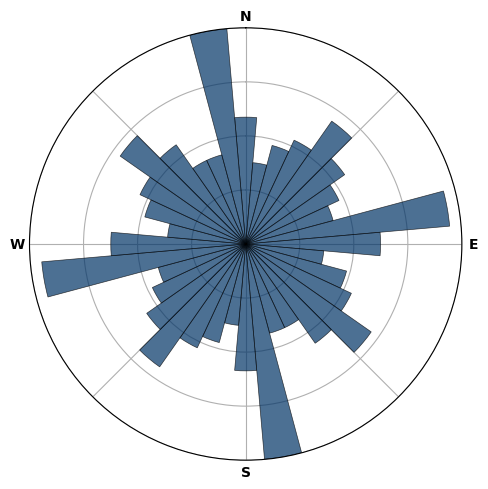

In [12]:
ox.plot_orientation(G)

In general the bearings are in $[0\degree,360\degree[$, not respecting
directionality. For the visualization we want $90\degree$-periodicity, so we
set a new edge attribute with the modulo of $90\degree$.
With this new edge attribute we can use the
`get_edge_colors_by_attr`-function and pass it a cyclic color map, as angles
are also in a cyclic space.
As no bearings are calculated for self loops, but these edges also need color
information, we filter them out and set their edge color transparent.

In [13]:
bearing_90 = nx.get_edge_attributes(G, 'bearing')
for node, bearing in bearing_90.items():
    if bearing >= 90:
        bearing_90[node] = bearing % 90
nx.set_edge_attributes(G, bearing_90, 'bearing_90')

In [ ]:
ec = ox.plot.get_edge_colors_by_attr(G, attr="bearing_90", cmap="hsv")

In [15]:
edges_wo_bearings = list(nx.edges(G))
for node in nx.get_edge_attributes(G, 'bearing').keys():
    edges_wo_bearings.remove(node[:2])
for edge in edges_wo_bearings:
    ec[(*edge, 0)] = (0, 0, 0, 0)

Plot graph with the calculated edge colors and transparent nodes.

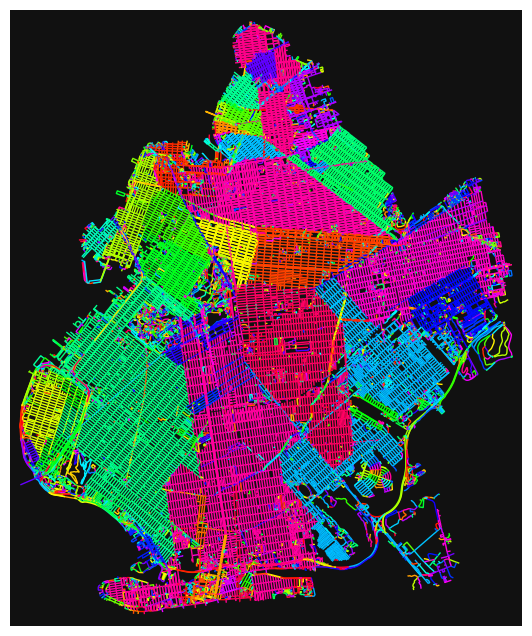

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [16]:
ox.plot_graph(
    G, node_alpha=0,
    edge_color=ec,
    edge_linewidth=1
)